In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx


In [2]:
pip install openpyxl

     |████████████████████████████████| 242 kB 2.3 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
athletes_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx')
EntriesGender_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx')
Teams_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx')
Coaches_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx')
Medals_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx')

/opt/conda/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
athletes_df.head()


,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [5]:
EntriesGender_df.head()


,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [6]:
Teams_df.head()


,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [7]:
Coaches_df.head()


,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [8]:
Medals_df.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
EntriesGender_df = EntriesGender_df.sort_values('Total', ascending = False)

In [11]:
EntriesGender_df.head()

,Discipline,Female,Male,Total
4,Athletics,969,1072,2041
36,Swimming,361,418,779
20,Football,264,344,608
29,Rowing,257,265,522
24,Judo,192,201,393


# Male and Female Participating in events

Text(0.5, 0, 'Total Participants')

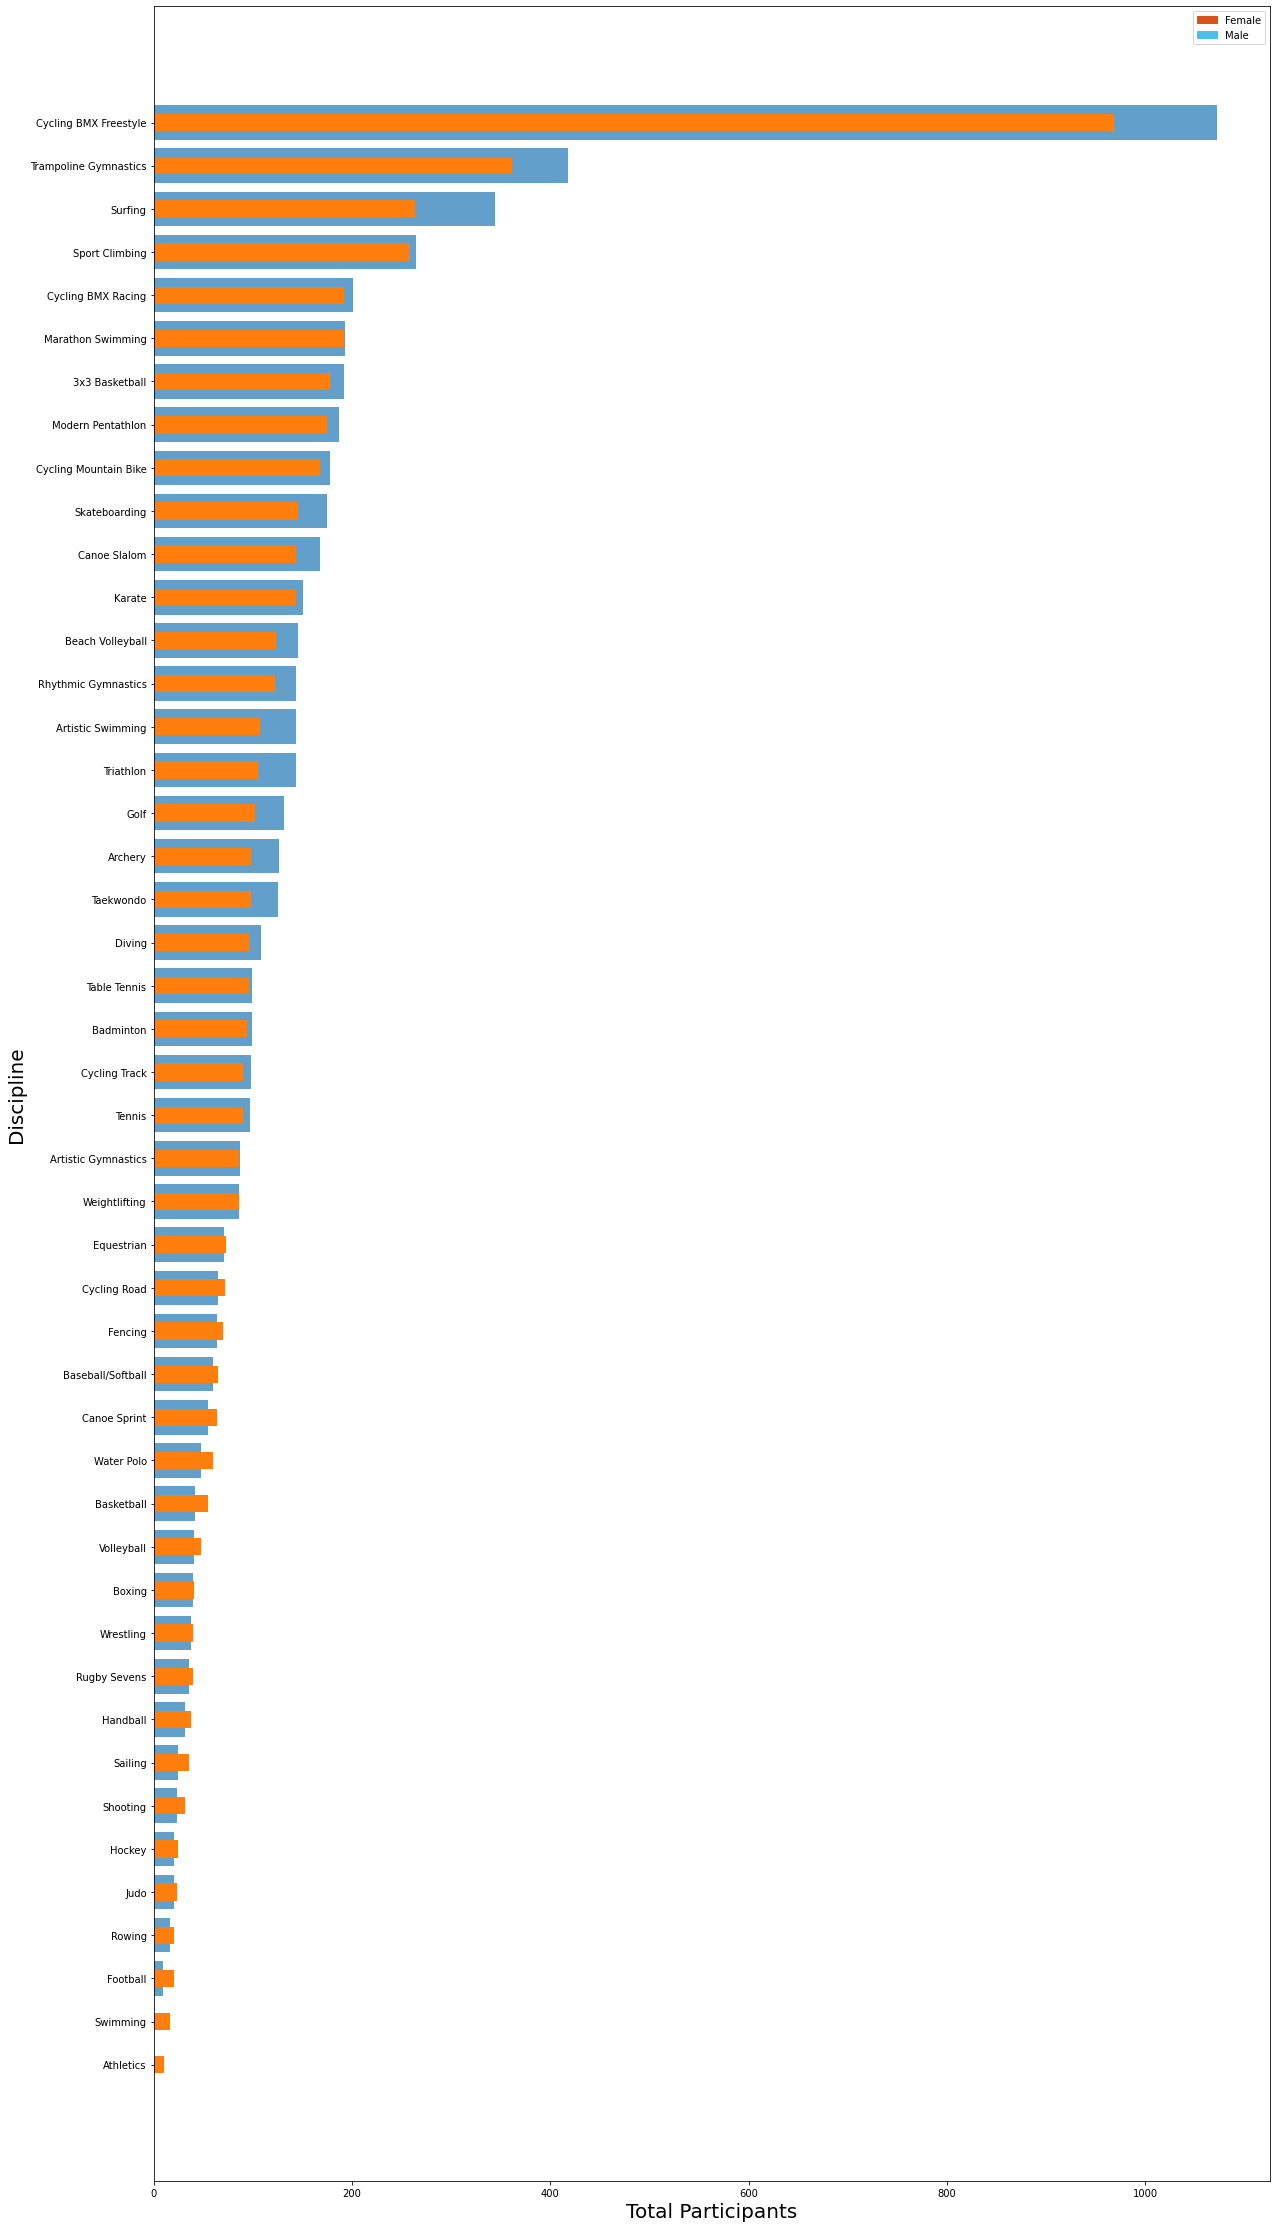

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (20, 40))
 
# creating the bar plot for Male and Female participant
plt.barh(EntriesGender_df.Discipline,EntriesGender_df.Male.sort_values() , alpha = 0.7)
plt.barh(EntriesGender_df.Discipline,EntriesGender_df.Female.sort_values(), height= 0.4)
colors = {'Female':'#D95319', 'Male':'#4DBEEE'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('Discipline', fontsize = 20)
plt.xlabel('Total Participants', fontsize = 20)

# TOP 10 COUNTRIES WITH HIGHEST TOTAL MEDALS

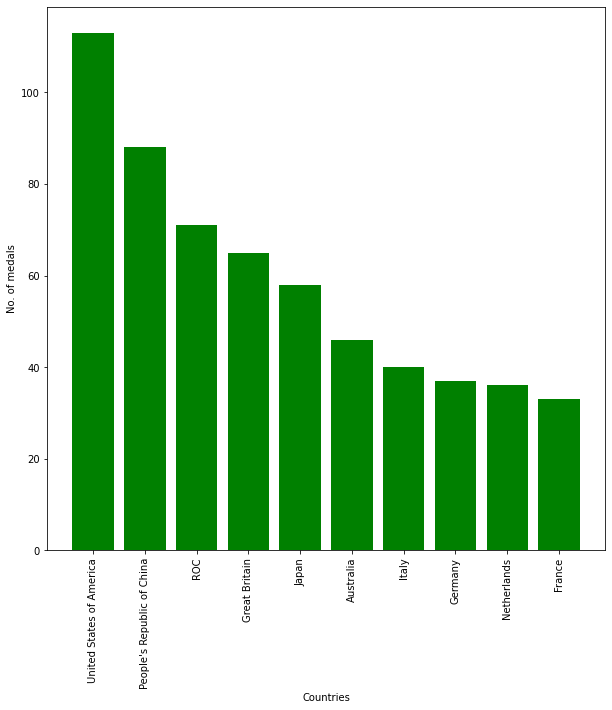

In [13]:
top_10 = Medals_df.sort_values('Rank by Total').head(10)
fig = plt.figure(figsize = (10, 10))
plt.bar(top_10['Team/NOC'], top_10['Total'], width=0.8, color='green')
#plt.title('TOP 10 COUNTRIES WITH HIGHEST TOTAL MEDALS', fontsize=20)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('No. of medals')
plt.show()

# Overall medal distribution

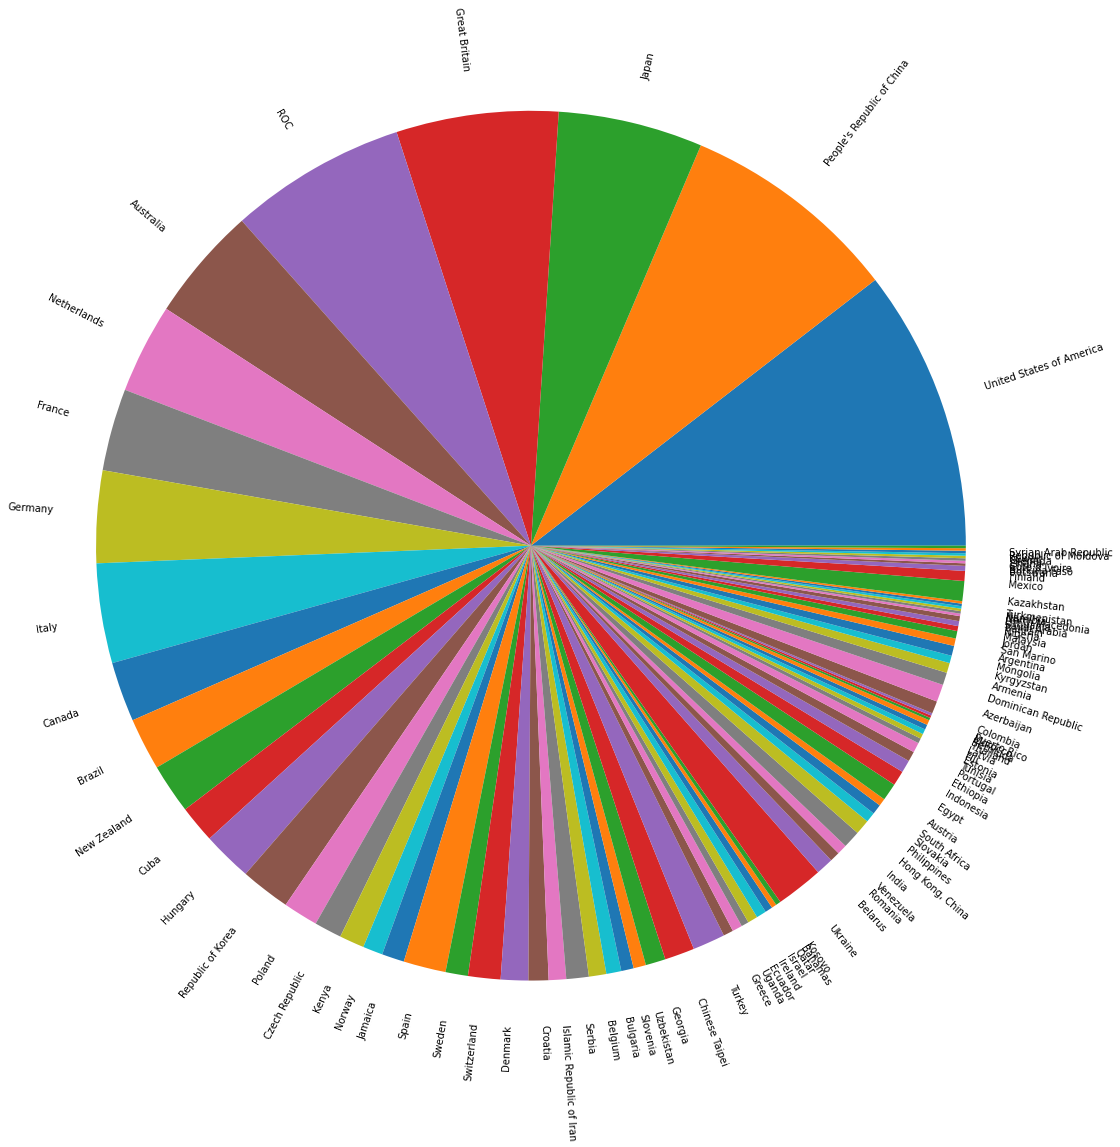

In [14]:
fig = plt.figure()
fig.set_facecolor('White')
plt.pie(Medals_df['Total'], labels=Medals_df['Team/NOC'], radius=5, rotatelabels=90)
plt.show()

# Female to male participation

<Figure size 432x288 with 0 Axes>

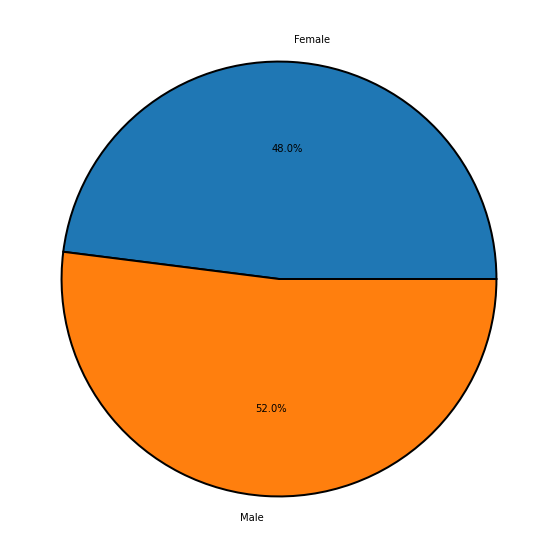

In [15]:
fem = sum(EntriesGender_df['Female'])
male = sum(EntriesGender_df['Male'])
series = [fem, male]
names=['Female', 'Male']
fig=plt.figure()
fig =  plt.figure(figsize = (10, 10))
fig.set_facecolor('White')
plt.pie(series, labels=names, wedgeprops={'edgecolor':'black', 'linewidth': '2'}, autopct='%1.1f%%')

#plt.line(final , x = 'Year' , y = [ 'Male' , 'Female' ])
plt.show()

# COUNTRIES WITH THE HIGHEST NUMBER OF COACHES

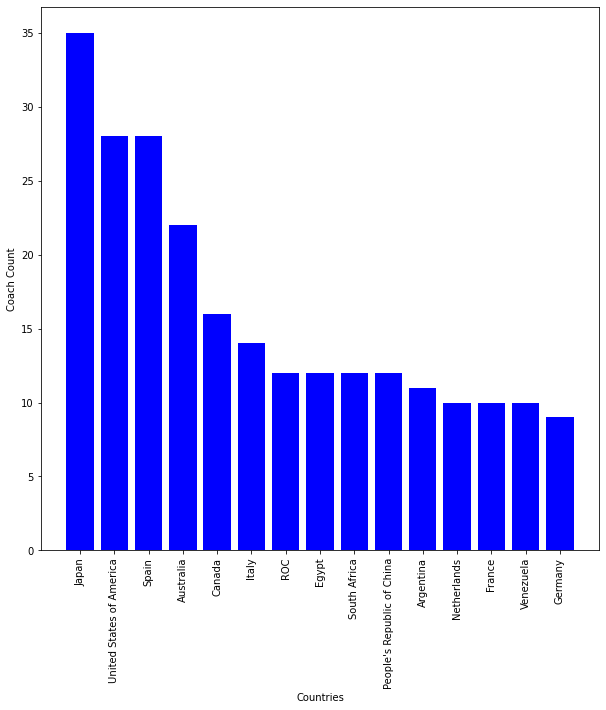

In [16]:
num_coa = Coaches_df.groupby('NOC').size()
num_coa=num_coa.to_frame('Count') 
fig =  plt.figure(figsize = (10, 10))
num_coa=num_coa.sort_values('Count', ascending=False).head(15)
plt.bar(num_coa.index.values, num_coa['Count'], color='Blue')
#plt.title('COUNTRIES WITH THE HIGHEST NUMBER OF COACHES', fontsize=20)
plt.xlabel('Countries')
plt.ylabel('Coach Count')
plt.xticks(rotation=90)
plt.show()